<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment3/Problem2_HW3_functionalAPI_100epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading Cats and Dogs data in a zip file


!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-15 20:19:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  98.3MB/s    in 0.7s    

2019-04-15 20:19:48 (98.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
#Unzipping the dataset file

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!ls /tmp/cats_and_dogs_filtered

train  validation  vectorize.py


In [0]:
#Creating separate folders for cats and dogs - training and valdiation sets

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
#Checking contents of Directories using os.listdir

train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()

#first 10 images
print(train_cat_fnames[40:50])
#last 10 images
print(train_cat_fnames[-50:40])
print()

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])
print(train_dog_fnames[-10:])

['cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg']
[]

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['dog.990.jpg', 'dog.991.jpg', 'dog.992.jpg', 'dog.993.jpg', 'dog.994.jpg', 'dog.995.jpg', 'dog.996.jpg', 'dog.997.jpg', 'dog.998.jpg', 'dog.999.jpg']


In [5]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print()
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000

Total validation cat images: 500
Total validation dog images: 500




 Showing sample images for Cats & Dogs




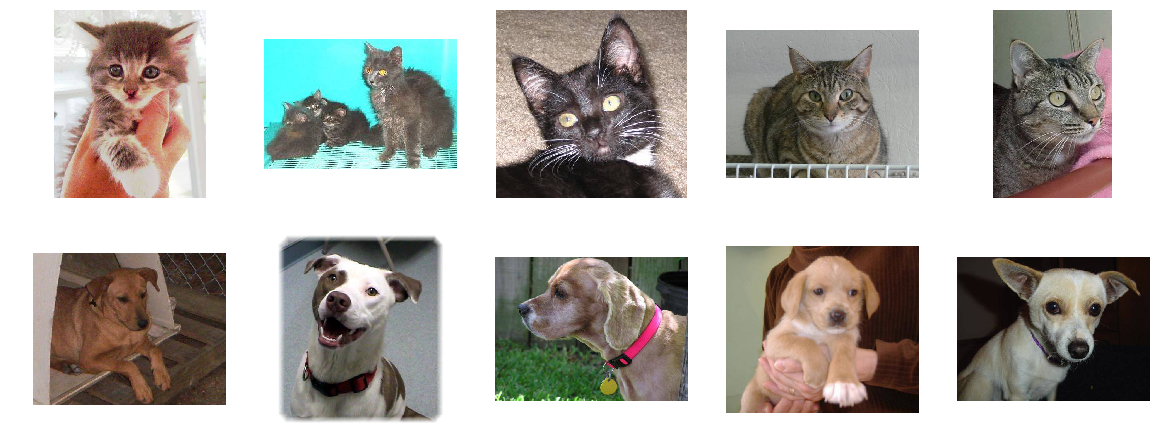

In [6]:
#Visualizing Cats and Dogs Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
print('\n\n Showing sample images for Cats & Dogs\n\n')
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-5:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-5:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
#Importing VGG-19 model

from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))


#Unfreezing convolutional base of VGG-19

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
    
    
layers = [print(layer, layer.name, layer.trainable) for layer in conv_base.layers]


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 19s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f61c3ea00f0> input_1 False
<keras.layers.convolutional.Conv2D object at 0x7f6177d47048> block1_conv1 False
<keras.layers.convolutional.Conv2D object at 0x7f6177d47978> block1_conv2 False
<keras.layers.pooling.MaxPooling2D object at 0x7f61774e8be0> block1_pool False
<keras.layers.convolutional.Conv2D object at 0x7f61774e8dd8> block2_conv1 False
<keras.layers.convolutional.Conv2D object at 0x7f61774a5ef0> block2_conv2 False
<keras.layers.pooling.MaxPooling2D object at 0x7f61774cf0f0> block2_pool False
<keras.layers.convolutional.Conv2D object at 0x7f61774cf748> block3_conv1 False
<keras.layers.convolutional.Conv2D object at 0x7f617747f3c8> block3_conv2 False
<keras.layers.convolutional.Conv2D object at 0x7f61774952b0> block3_conv3 False
<keras.layers.convolutional.Conv2D object at 0x7f617742eb38> block3

In [8]:
#Adding classifier and dense layers on top of VGG-19 base



from keras import layers
from keras import models,Model
from keras import optimizers
from keras.layers import Dense,Input, Flatten,Dropout


def model1():
  
  #with dropout
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model


def model2():

  model = models.Sequential()
  model.add(conv_base)
  #with dropout
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))

  model.add(layers.Dense(1, activation='sigmoid'))

  return model



def model3():
  
  model = models.Sequential()
  model.add(conv_base)
  #with dropout
  model.add(Flatten())  
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model3_functional_API():
  
  # build top model
  x = Flatten(name='flatten')(conv_base.output)
  x = Dense(512, activation='relu', name='fc1')(x)
  x = Dropout(0.3)(x)
  x = Dense(512, activation='relu', name='fc2')(x)
  x = Dropout(0.3)(x)
  x = Dense(1, activation='sigmoid', name='predictions')(x)

  # stitch together
  model = Model(inputs= conv_base.input, outputs=x)

  return model   




def model4():
  
  #no dropuut
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model


model=model3_functional_API()
model.summary()

layers = [print(layer, layer.name, layer.trainable) for layer in model.layers]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
___________________________

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 51s 508ms/step - loss: 0.6023 - acc: 0.6597 - val_loss: 0.3673 - val_acc: 0.8376
Epoch 2/100
100/100 [==============================] - 43s 428ms/step - loss: 0.4192 - acc: 0.8066 - val_loss: 0.2603 - val_acc: 0.8821
Epoch 3/100
100/100 [==============================] - 43s 431ms/step - loss: 0.3541 - acc: 0.8409 - val_loss: 0.2241 - val_acc: 0.9055
Epoch 4/100
100/100 [==============================] - 42s 425ms/step - loss: 0.2980 - acc: 0.8712 - val_loss: 0.2353 - val_acc: 0.9091
Epoch 5/100
100/100 [==============================] - 43s 428ms/step - loss: 0.2887 - acc: 0.8784 - val_loss: 0.2106 - val_acc: 0.9061
Epoch 6/100
100/100 [==============================] - 43s 430ms/step - loss: 0.2510 - acc: 0.8897 - val_loss: 0.1915 - val_acc: 0.9182
Epoch 7/100
100/100 [==============================]

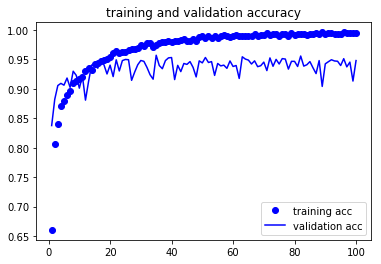

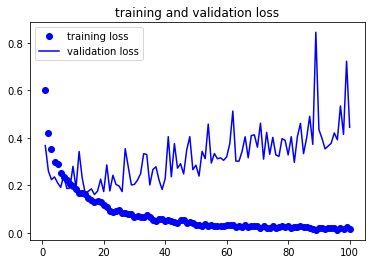

In [9]:
 



from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=0.00001), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)


%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()





In [0]:
model_fname = 'cats_and_dogs_fine_tuning_functionalAPI_100_epochs.h5' 
model.save(model_fname)

from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)